<a href="https://colab.research.google.com/github/kathelynn/Colab-for-waifu2x-ncnn/blob/master/waifu2x_ncnn_vulkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# waifu2x-ncnn-vulkan in Google Colab by kathelynn
[ncnn-vulkan](https://github.com/nihui/waifu2x-ncnn-vulkan) is an alternative to [caffe](https://github.com/lltcggie/waifu2x-caffe).

The ipynb for caffe will be available in the near future that utilizes Google Colab's GPU.

This is CPU only but GPU can be enabled with a slight bit of tweaking.

# Initialization
Start the first block of code to initialize waifu2x. Do this by hovering on the code found below, and then press play. Wait for it to finish loading, and then scroll down until you see "Input". You only need to do this once!

In [1]:
import os
import shutil
import glob
from google.colab import files
from json import load
!apt install libvulkan-dev

!curl -o latest "https://api.github.com/repos/nihui/waifu2x-ncnn-vulkan/releases/latest"
with open('latest') as latest:
  get_body = load(latest)
for item in get_body['assets']:
  if 'ubuntu' in item['name']:
    name = item['name'].replace('.zip', '')
    url = item['browser_download_url']
    break
!curl -L -o waifu2x.zip "$url"
!unzip -q -o waifu2x.zip
print('Done!')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  libvulkan-dev libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,632 kB of archives.
After this operation, 22.2 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 libvulkan1 amd64 1.1.126.0-2~gpu18.04.1 [101 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 mesa-vulkan-drivers amd64 20.0.8-0ubuntu1~18.04.1 [3,059 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 libvulkan-dev amd64 1.1.126.0-2~gpu18.04.1 [472 kB]
Fetched 3,632 kB in 2s (2,059 kB/s)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 160980 files and directories currently installed.)
Prepar

# Input
Run this block of code and press the Choose Files button to upload your images.

In [3]:
shutil.rmtree('/content/input') if os.path.exists('/content/input') else False
os.mkdir('/content/input')
os.chdir('/content/input')
files.upload()

Saving 92c1c93a7cf6f1ad8a4a9a50b981c4e8.jpg to 92c1c93a7cf6f1ad8a4a9a50b981c4e8.jpg


{'92c1c93a7cf6f1ad8a4a9a50b981c4e8.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc2\x00\x11\x08\x03?\x03\xe8\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x01\x00\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x08\x06\t\x04\x05\n\x03\x02\x01\xff\xc4\x00\x1d\x01\x01\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x02\x03\x04\x06\x07\x01\x08\t\xff\xda\x00\x0c\x03\x01

# Output
Run this block of code to process the images you've uploaded. Please take note that the process will take a while depending on the images uploaded. You may wait until the message "Done!" appears.

In [23]:
shutil.rmtree('/content/output') if os.path.exists('/content/output') else False
os.mkdir('/content/output')
os.chdir('/content/output')
noise = int(input('Noise level? ') or 0)
scale = int(input('Scale? ') or 2)
print("Processing... This may take a while!")
!/content/$name/waifu2x-ncnn-vulkan -g -1 -i /content/input -o /content/output -n $noise -s $scale
print("Done!") if glob.glob('*') else print("Failed. Maybe try lowering the values?")
for item in glob.glob('*'):
  files.download(item)

Noise level? 0
Scale? 2
Processing... This may take a while!
vkEnumeratePhysicalDevices failed -3
tcmalloc: large alloc 1571840000 bytes == 0xd6a78000 @  0x7efeabff8b6b 0x7efeac018379 0x6273d3 0x6402b6 0x610413 0x481831 0x481831 0x481831 0x4818aa 0x4818aa 0x481831 0x481831 0x481831 0x5a6b96 0x5a9661 0x5aef96 0x43bb96 0x7efeab5556db 0x7efeabd1371f
tcmalloc: large alloc 1551523840 bytes == 0xabddc000 @  0x7efeabff8b6b 0x7efeac018379 0x627694 0x63ff23 0x610413 0x4818aa 0x481831 0x481831 0x481831 0x5a6b96 0x5a9661 0x5aef96 0x43bb96 0x7efeab5556db 0x7efeabd1371f
tcmalloc: large alloc 1551835136 bytes == 0x108582000 @  0x7efeabff8b6b 0x7efeac018379 0x6273d3 0x64019c 0x610413 0x4818aa 0x481831 0x481831 0x481831 0x5a6b96 0x5a9661 0x5aef96 0x43bb96 0x7efeab5556db 0x7efeabd1371f
tcmalloc: large alloc 1551523840 bytes == 0x77bbe000 @  0x7efeabff8b6b 0x7efeac018379 0x6273d3 0x6402b6 0x610413 0x4818aa 0x481831 0x481831 0x481831 0x5a6b96 0x5a9661 0x5aef96 0x43bb96 0x7efeab5556db 0x7efeabd1371f
tcmal

# When not in use
Please terminate the session so that you don't hit the quota too quickly. You can do this by pressing:    
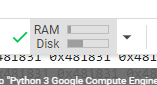    
*(Located at the top-right corner)*    
From there, you can see your active sessions.

# Reset
If nothing works properly, run this block of code. You will have to initialize waifu2x again!

In [ ]:
os._exit(00)